In [2]:
# Plot
plotsPath = "/Users/brunogoes/Dropbox/GitHub/ThesisSPI/Chapter4/Figures/"
font_Size = 24

In [3]:
# Qutip
from qutip import *

#from collections import namedtuple

# Scipy
import scipy as sp
import scipy.integrate as integrate
import scipy.special as special
import scipy.sparse as spr
from scipy.sparse.linalg import eigs
from scipy.integrate import quad, dblquad

# Matplotlib
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# For latex fonts in the plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.style.use('ggplot')

# For indexing plots smartly and automatically
import string
alphabet = list(string.ascii_lowercase)

# Math
import csv
import numpy as np
import math as mt
from sympy import Matrix

# To animate the Bloch sphere
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Bonus
import itertools as itr
from tqdm import tqdm_notebook
import time
import imageio
import time, sys
from IPython.display import clear_output
from scipy.sparse.linalg import eigs
import pickle

# Poincaré spheres

## Single photon pulse

In [4]:
####################################################
#                Single photon pulse
####################################################

def Intensities_single_photon_pulse(t, γ=1):
    
    f1 = np.sqrt(γ)*np.exp(-γ*t/2)
    
    f2 = np.sqrt(γ)*t*np.exp(-γ*t/2)
    
    I_r = (f1 - γ*f2)**2/2
    
    I_l = f1**2/2
    
    Int = f1*(f1 - γ*f2)
   
    return [I_r + I_l, I_r - I_l, Int]

def Poin_vecs_SPP(intensities_vec_t):
    v = intensities_vec_t
    
    S_up = [v[2]/v[0], 0, v[1]/v[0]]
    
    S_dw = [v[2]/v[0], 0, -v[1]/v[0]]
    
    return[S_up, S_dw]

In [5]:
t_SPP = np.arange(0, 200.05,0.05)

In [6]:
I_tot_vec = [Intensities_single_photon_pulse(t)[0] for t in t_SPP]

In [7]:
Poinc_vecs_SPP = Poin_vecs_SPP(I_tot_vec) 

In [8]:
Poinc_vecs_SPP_list = [Poin_vecs_SPP(Intensities_single_photon_pulse(t, 1)) for t in t_SPP]

In [9]:
P_up_SPP = [Poinc_vecs_SPP_list[i][0] for i in np.arange(0,len(Poinc_vecs_SPP_list))]
P_dw_SPP = [Poinc_vecs_SPP_list[i][1] for i in np.arange(0,len(Poinc_vecs_SPP_list))]

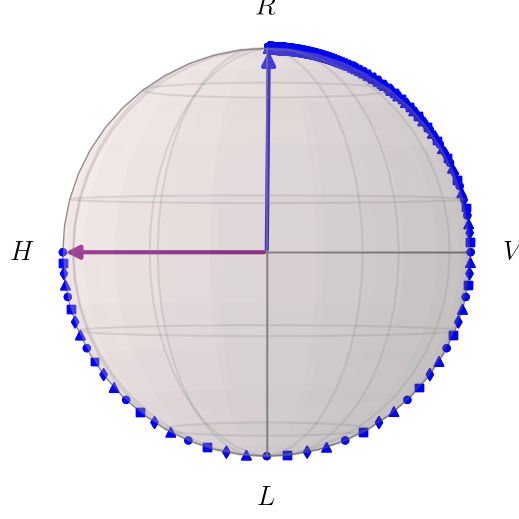

In [10]:
# I'm interested just in the H-R plane
view = [0,0] 

# I'll plot the Poincaré vectors of spin up, the following is a list of these vectors
states = P_up_SPP

# Initialize the Poincaré sphere
b = Bloch()
b.view = view

# Name the axes
b.xlabel= [r'$H$', r'$V$']
# I'm interested just in the H-R plane, hence I do this trick by hand, but could be better implemented.
b.ylabel= ['', ''] #[r'$\left|A\right>$', r'$\left|D\right>$']
b.zlabel= [r'$R$', r'$L$']

#Add the initial and final vectors
b.vector_color = ['purple', 'b']
b.add_vectors(states[0])
b.add_vectors(states[-1])

length = len(states)

# Add the points during the dynamics
for i in range(length):
    b.point_color = 'b'
    b.add_points(states[i])

# Save the figure with pdf and vectorized formats
b.save(plotsPath+'S_up_SPP.pdf')
b.save(plotsPath+'S_up_SPP.svg')

# Plot the Bloch sphere on the new figure
b.show()

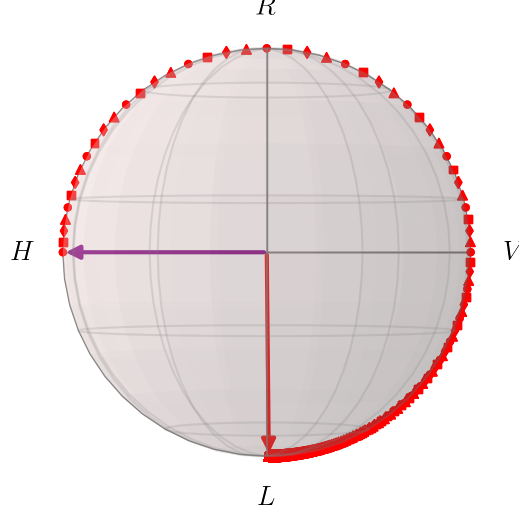

In [11]:
# I'm interested just in the H-R plane
view = [0,0] 

# I'll plot the Poincaré vectors of spin up, the following is a list of these vectors
states = P_dw_SPP

# Initialize the Poincaré sphere
b = Bloch()
b.view = view

# Name the axes
b.xlabel= [r'$H$', r'$V$']
# I'm interested just in the H-R plane, hence I do this trick by hand, but could be better implemented.
b.ylabel= ['', ''] #[r'$\left|A\right>$', r'$\left|D\right>$']
b.zlabel= [r'$R$', r'$L$']

#Add the initial and final vectors
b.vector_color = ['purple', 'r']
b.add_vectors(states[0])
b.add_vectors(states[-1])

length = len(states)

# Add the points during the dynamics
for i in range(length):
    b.point_color = 'r'
    b.add_points(states[i])
    
# Save the figure with pdf and vectorized formats
b.save(plotsPath+'S_dw_SPP.pdf')
b.save(plotsPath+'S_dw_SPP.svg')

# Plot the Bloch sphere on the new figure
b.show()

## Coherent pulse

In [13]:
basis(4,0)

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [12]:
[spinDw, spinUp, trionDw, trionUp] = [basis(4,i) for i in range(0,4)]

In [13]:
sigmaL = spinUp*(trionUp.dag())
sigmaR = spinDw*(trionDw.dag())

In [14]:
Delta = 0
H0 = Delta*(sigmaR.dag()*sigmaR + sigmaL.dag()*sigmaL) 

In [15]:
tf = 100
number_of_steps = 500
t_list = linspace(0,tf,number_of_steps)

In [16]:
n_H = 1
Gamma = 1
alpha_t_list = [np.sqrt(n_H*Gamma)*np.exp(-Gamma*t) for t in t_list]

In [17]:
Htot = [[(sigmaR.dag() - sigmaR), alpha_t_list], [(sigmaL.dag() - sigmaL), alpha_t_list]]

In [18]:
initial_state = (spinDw + spinUp).unit()
initial_state

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]

In [19]:
dyn_solution = mesolve(Htot, initial_state, t_list,  c_ops = [sigmaR, sigmaL], args = None)

TypeError: Incorrect Q_object specification

In [20]:
dyn_solution.states()

NameError: name 'dyn_solution' is not defined